# 🩺 Medical appointment - No Show
Entramos em acordo para utilizar o dataset "Medical appointment No show" que se refere aos agendamentos de consultas médicas, de pacientes que apareceram e não apareceram (variável target). Retiramos o dataset do [kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

# Importando bibliotecas

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Importando dataset

In [5]:
# df = pd.read_csv('/content/drive/MyDrive/Let\'s Code/Turmas/[be-tech-by-brasken] Machine Learning II/7. MACHINE LEARNING II/Projeto orientado/KaggleV2-May-2016.csv')
# df = pd.read_csv('/content/drive/MyDrive/ADA_Braskem/Curso/7-[DS-PY-010] MACHINE LEARNING II/Projeto Orientado/KaggleV2-May-2016.csv')
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Inspecionando o Dataset

In [6]:
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# EDA - Exploratory Data Analysis

## Análise da Variável Target

In [9]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

In [10]:
df['No-show'].value_counts(normalize=True)

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

## Variáveis Explicativas

### Univariadas

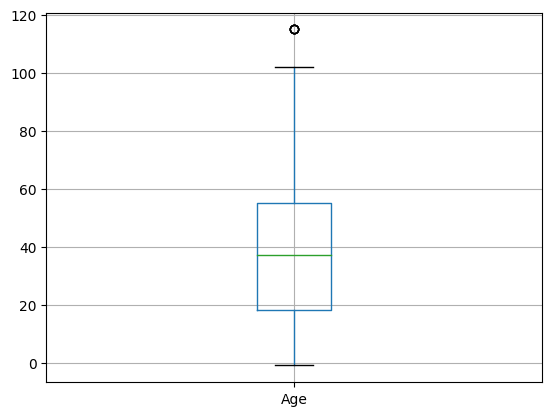

In [11]:
df.boxplot(column='Age')
plt.show()

In [12]:
print('Scholarship')
print(df['Scholarship'].value_counts(normalize=True))
print('----------')
print('Hipertension')
print(df['Hipertension'].value_counts(normalize=True))
print('----------')
print('Diabetes')
print(df['Diabetes'].value_counts(normalize=True))
print('----------')
print('Alcoholism')
print(df['Alcoholism'].value_counts(normalize=True))
print('----------')
print('Handcap')
print(df['Handcap'].value_counts(normalize=True))
print('----------')
print('SMS_received')
print(df['SMS_received'].value_counts(normalize=True))

Scholarship
Scholarship
0    0.901734
1    0.098266
Name: proportion, dtype: float64
----------
Hipertension
Hipertension
0    0.802754
1    0.197246
Name: proportion, dtype: float64
----------
Diabetes
Diabetes
0    0.928135
1    0.071865
Name: proportion, dtype: float64
----------
Alcoholism
Alcoholism
0    0.9696
1    0.0304
Name: proportion, dtype: float64
----------
Handcap
Handcap
0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: proportion, dtype: float64
----------
SMS_received
SMS_received
0    0.678974
1    0.321026
Name: proportion, dtype: float64


Hipótese: Mulheres são mais consciêntes em relação a saúde do que os homens 🤔


In [13]:
df['Gender'].value_counts(normalize=True)

Gender
F    0.649977
M    0.350023
Name: proportion, dtype: float64

In [14]:
df['Neighbourhood'].value_counts()

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

In [15]:
df['ScheduledDay'].value_counts()

ScheduledDay
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: count, Length: 103549, dtype: int64

In [16]:
df['AppointmentDay'].value_counts()

AppointmentDay
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: count, dtype: int64

### Bivariadas

In [17]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [18]:
df_exp = df[['Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']]

In [19]:
df_exp.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<ipython-input-53-20d829244748>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['No-show'] = df_exp['No-show'].map({'No': 0, 'Yes': 1})


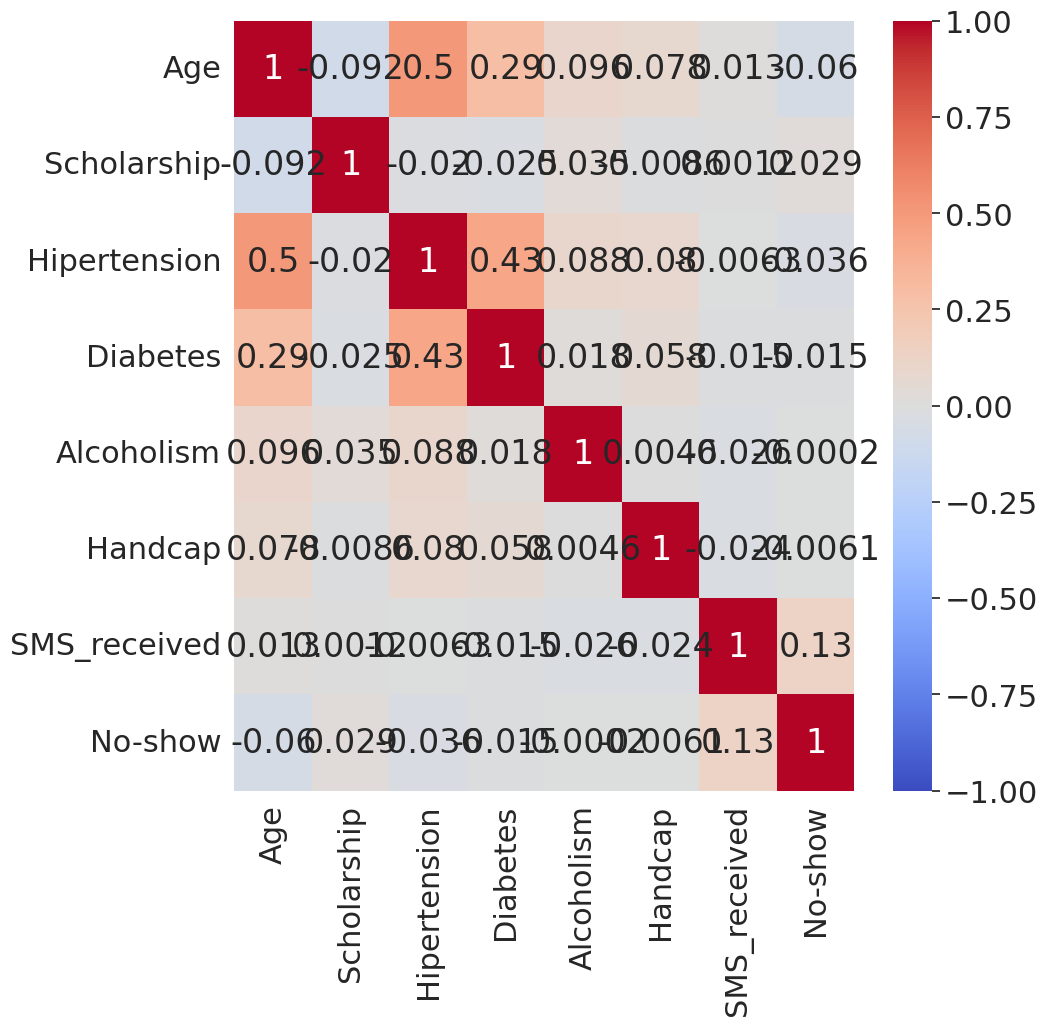

In [ ]:
# Convert 'No-show' to binary values (0 for 'No' and 1 for 'Yes')
df_exp['No-show'] = df_exp['No-show'].map({'No': 0, 'Yes': 1})

# List of columns for correlation calculation, including 'No-show'
columns_for_correlation = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

# Calculate the correlation matrix
correlation_matrix = df_exp[columns_for_correlation].corr()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
sns.set(font_scale=2)
plt.show()

# Feature Engineering

* Criar variável de tempo entre marcação da consulta e a data da consulta
* Agrupamento dos bairros por região